<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Максим! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
import sklearn # Проверка версии sklearn. Обновляем при необходимости
if sklearn.__version__[0] == '0':
    !pip install scikit-learn -U # После установки надо перезапустить ядро
sklearn.__version__ 

'1.5.1'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tqdm import notebook
import re

try:
    import spacy 
except:
    !pip install spacy
    import spacy

try:
    import torch
except:
    !pip install torch
    import torch

try:
    import transformers
except:
    !pip install transformers
    import transformers

try:
    from ydata_profiling import ProfileReport
except:
    !pip install -U Pillow # Для решения ошибки с профайлером
    !pip install -U ydata-profiling
    from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.

----------------------
    
С одной стороны ты молодец, что использовал try-except для установки библиотек в окружение. 
Но советую тебе держать в голове "другую сторону медали".  Я бы не советовал прятать установку библиотек внутри импортов, т.к. установка новой библиотеки это не всегда "безболезненно". Пользователь твоего ноутбука может запустить его не только где-то в облаке, где виртуальное окружение вскоре перезагрузится на дефолтную, а в своем рабочем окружении. И в этом случае любая новая установка - это потенциальная угроза, т.к. установка одной библиотеки может повлечь за собой обновление других, что может привести к нарушению работы уже работающего кода.
</div>

In [3]:
RANDOM_STATE = 42424242
SAMPLE_SIZE = 500

## Подготовка

Для начала загрузим данные и сразу-же с ними ознакомимся.

In [4]:
try:
    ds = pd.read_csv('/datasets/toxic_comments.csv', index_col='Unnamed: 0')
except:
    ds = pd.read_csv('datasets/toxic_comments.csv', index_col='Unnamed: 0')
ProfileReport(ds)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Дизбаланс классов в целевом признаке, токсичных комментариев почти в 10 раз меньше, чем нетоксичных. Без стратификации здесь не обойтись. 

Для начала извлечём из генеральной совокупности выборку. Обработка всех имеющихся у нас записей при помощи BERT займёт около двух суток, поэтому возьмём лишь небольшую часть.

In [5]:
ds, _ = train_test_split(ds, test_size=len(ds) - SAMPLE_SIZE, stratify=ds['toxic'], random_state=RANDOM_STATE)
ds = ds.reset_index(drop=True)
ds['toxic'].value_counts()

toxic
0    449
1     51
Name: count, dtype: int64

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, исследован баланс классов. Это важная информация для задачи классификации.</div>

Теперь объявим токенизатор и саму модель BERT, возьмём модель стандартного размера.

In [6]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased')  
model = transformers.BertModel.from_pretrained('bert-base-cased')

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Я вижу ты использовал именно cased модель, т.е. чувствительную к регистру. Это сознательный выбор или "так получилось"?</div>

Теперь создадим класс для обработки данных. На вход он будет принимать признак `text`, проводить лемматизацию, убирать любые символы помимо английского алфавита, проводить токенизацию, приводить токены к одному размеру посредством добавления нулей в конец и, наконец, поэтапно проводить обработку текста, возвращая нам объединённую матрицу эмбеддингов. Звучит просто, но это займёт какое-то время.

In [7]:
class ToxicFeatures(TransformerMixin, BaseEstimator):
    def __init__(self, max_len=512):
        self.max_len = max_len
    
    def fit(self, X, y): 
        # Обучение классу не требуется, скипаем
        return self
    
    def transform(self, X): 
        # Лемматизация
        spc = spacy.load('en_core_web_sm')
        lemmatized = X.apply(lambda x: ' '.join([token.lemma_ for token in spc(x)]))
        # Очистка от лишних символов
        regular = lemmatized.apply(lambda x: ' '.join((re.sub(r'[^a-zA-Z]', ' ', x)).split()))
        # Токенизация
        tokenized = regular.apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=self.max_len, truncation=True))
        max_len = max(tokenized.apply(len))
        padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
        attention_mask = np.where(padded != 0, 1, 0)
        batch_size = 100
        embeddings = []
        for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
            batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
            attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
            
            with torch.no_grad(): # Для ускорения вычислений отключим градиенты
                batch_embeddings = model(batch, attention_mask=attention_mask_batch)
            
            embeddings.append(batch_embeddings[0][:,0,:].numpy())
        return np.concatenate(embeddings)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Раз ты использовал библиотеку spaCy, то оставлю совет, который обычно оставляю когда запускается лемматизация на полном датасете
    
----------------    
    
Очень круто, что ты используешь spaCy. Но лемматизаторspaCy работает безумно долго и скорее всего, у тебя сложилось впечатление, что он неудобен. На самом деле spaCy, в отличие от других библиотек - это библиотека ориентированая на создание индустриальных решений, тогда как другие библиотеки созданы для исследователей (академического сообщества). А работает он долго потому, что заодно с лемматизацией решает кучу других задач. Увидеть эти задачи ты можешь вызвав команду:
    
     nlp.pipe_names
Скорее всего ты увидишь следующее:
    
     ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
 
Т.е. создавая объект nlp ты кроме нужной задачи (лемматизации) решаешь задачи получения эмбедингов, определение частей речи, определение взаимосвязей между токенами, нахождение именованных сущностей. Отключить не нужное повведение очень легко используя вот такой шаблон:
    
    disabled_pipes = [ "parser",  "ner"]
    nlp = spacy.load('en_core_web_sm', disable=disabled_pipes)
    
И выполняться такой пайплайн будет  быстрее.
    
Важно - отключать нужно именно указанные мною шаги. Удаление остальных приведет к тому, что лемматизация прекратит работать.
    
А еще для ускорения spaCy можно использовать spaCy pipeline (https://spacy.io/usage/processing-pipelines)
    
    
    lemm_texts = []

    for doc in tqdm(nlp.pipe(data['text'].values, disable = ['ner', 'parser']), total=data.shape[0]):
        lemm_text = " ".join([i.lemma_ for i in doc])    
        lemm_texts.append(lemm_text) 
    
Когда я проверял, у меня получилось ускорить почти в два раза.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Скажу честно, лемматизация здесь лишняя, как и чистка текстов от знаков препинания.
    
Нужно понимать, что модель BERT обучалась на "сырых" текстах и всю предобработку выполняет токенайзер.
    
Я бы ограничился чисткой текстов от мусора (типа HTML тегов и прочего), а больше ничего не менял.    
</div>

Класс есть - остаётся запустить обработку входного признака.

In [8]:
tf = ToxicFeatures()
features = tf.transform(ds['text'])

  0%|          | 0/5 [00:00<?, ?it/s]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍  Молодец, эмбеддинги получены. И ты прав,  что на CPU это работает работает долго. При наличии GPU (на локальной машине или облачного) можно заметно ускорить выполнение расчетов, например, при запуске на 500 объектов векторизация длилась всего 11 секунд..
    
Хорошо, если у тебя есть собственный GPU от NVidia. А если нет - то один из вариантов использовтаь GPU для обучения или инференса моделей - это использование облачного сервиса Google Colab. Он предлагает знакомые ноутбуки + беспплатный GPU (пусть и на ограниченное время)     

Рекомендую познакомиться с этой средой. Вот здесь можешь глянуть, что это такое на самом базовом уровне, а более глубокое знакомство можно начать с официального туториала.
    
  - https://blog.skillfactory.ru/chto-takoe-google-colaboratory-i-komu-on-nuzhen/
  - https://sky.pro/media/google-colab/
  - https://colab.research.google.com/?hl=RU
    |
    
Вот изменения, которые я внес в код, чтобы вычисления пошли на GPU
    
    
``` python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device);
    
...
    
    with torch.no_grad(): # Для ускорения вычислений отключим градиенты
        batch_embeddings = model(batch.to(device), attention_mask=attention_mask_batch.to(device))

    embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
    
...    
 
```    

</div>

Теперь разделим данные на тренировочную и тестовую выборки. И не забудем про стратификацию. Тестовую отложим, а тренировочную используем для подбора гиперпараметров.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    ds['toxic'], 
    stratify=ds['toxic'], 
    test_size=0.2, 
    random_state=RANDOM_STATE)

Итого, мы взяли из генеральной совокупности стратифицированную выборку, провели обработку входного текста при помощи BERT и извлекли из получившихся записей тренировочную и тестовую выборки.

## Обучение

Для подбора гиперпараметров мы будем использовать объекты GridSearchCV. Мы потратили достаточно много времени на обработку данных, зато из-за размера получившихся выборок обучение моделей будет проходить как никогда быстро, а значит мы можем позволить себе чуть больше итераций обучения, чем обычно.

В качестве метрики используем f1, она учтёт как ложноположительные, так и ложноотрицательные ответы. Начнём с чего-нибудь простого и линейного, логистическая регрессия более чем подойдёт.

In [10]:
lr_params = {
    'C':list(map(lambda x: x/10.0, range(1, 21))),
    'solver':['lbfgs', 'liblinear', 'newton-cg']
}

lr_cv = GridSearchCV(
    LogisticRegression(random_state=RANDOM_STATE),
    param_grid=lr_params,
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(4, shuffle=True, random_state=RANDOM_STATE)
)
lr_cv.fit(X_train, y_train)
lr_cv.best_score_

0.42136752136752137

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не стоит перебирать гиперпараметр "решающий алгоритм" - solver. Из спринта "Численые методы" ты знаешь, что модель логистической регрессии обучается методом градиентного спуска (при этом глобальный минимум у оптимизируемой функции один). Solver может влиять на скорость сходимости, КАК будут делаться шаги градиентного спуска (длина и направление), но в любом случае если они сойдутся - то в одной точке (возможны небольшие отклонения из за округлений). 
    
Просто подбери экспериментально пару max_iter/solver (вне кросс-валидации), а поиском по сетке подбирай что-нибудь более значимое (как раз регуляризацию).    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я вижу что ты уверенно работаешь с конструкциями типа map/lambda, но они достаточно тяжело читаемы. А одна из ключевых рекомедаций The Zen of Python - "читаемость имеет значение" и "явное лучше неявного".
    
Сравни
    
```python 
   
list(map(lambda x: x/10.0, range(1, 21)))    
    
```   
    
и второй вариант:    
```python
   
np.arange(0.1, 2.1, 0.1)    
    
```    
    
На мой взгляд второй вариант заметно выигрывает в читаемости. 
    
</div>

Не совсем то значение, на которое мы рассчитывали. Возможно лучше логистической регрессии справится классификатор к-ближайших соседей.

In [11]:
kn_params = {
    'n_neighbors':range(1, 10),
    'p':[1, 2]
}

kn_cv = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=kn_params,
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(4, shuffle=True, random_state=RANDOM_STATE)
)
kn_cv.fit(X_train, y_train)
kn_cv.best_score_

0.5218885281385282

Значение метрики действительно выросло. Попробуем также методу опорных векторов проявить себя.

In [12]:
svm_params = {
    'C':list(map(lambda x: x/10.0, range(1, 21))),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':range(2, 6)
}

svm_cv = GridSearchCV(
    SVC(),
    param_grid=svm_params,
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(4, shuffle=True, random_state=RANDOM_STATE)
)
svm_cv.fit(X_train, y_train)
svm_cv.best_score_

C:\Users\m8913\anaconda3\envs\practicum\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.5219298245614035

Значение метрики сравнимо схожее, но всё-же выше, чем у к-ближайших соседей. Отправим модель SVC на финальное тестирование и пронаблюдаем за значением метрики на тестовых данных.

## Тестирование

In [13]:
%matplotlib inline
def res_pres(true, pred, name): # Функция для быстрой презентации результатов тестирования
    print(name)
    print('f1:', f1_score(y_test, pred).round(3))
    ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot(cmap=plt.cm.Purples)

Прежде, чем мы начнём тестировать лучшую модель, обучим также модель-болванку. Она всегда будет предсказывать единицы, а значит всегда сообщать, что текст токсичен.

Модель-болванка
f1: 0.182


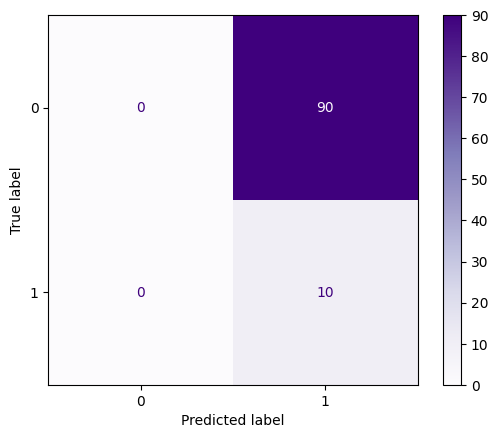

In [14]:
dummy = DummyClassifier(strategy='constant', constant=1)
dummy.fit(X_train, y_train)
res_pres(y_test, dummy.predict(X_test), 'Модель-болванка')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Теперь, когда у нас есть с чем сравнить значение метрики, обучим лучшую модель на всей тренировочной выборке и попросим сделать предсказания для тестовых данных. Сразу-же отправим истинные и предсказанные значения для расчёта метрики f1 и вывода матрицы ошибок.

Метод опорных векторов
f1: 0.8


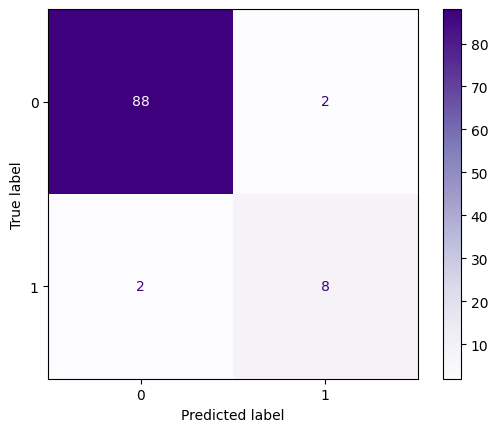

In [15]:
svm_cv.best_estimator_.fit(X_train, y_train)
res_pres(y_test, svm_cv.best_estimator_.predict(X_test), 'Метод опорных векторов')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - выбрана лучшая модель
  - тестирование произведено корректно 
  - достигнута метрика f1 выше 0,75 на тестовой выборке
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Проходная метрика достигнута. Но должен сказать честно - похоже здесь все-таки больше элемент везения. Размер тестовой выборки небольшой и так получилось, что в ней все записи оказались "удобными". Но возможно с другим разбиением на  трейн и тест метрика бы  стала заметно хуже. Я перезапустил твой код на 5000 записей и метрика вышла 0,71. 

    
Как правило в этом проекте очень сложно достичь проходной метрики используя "обычные" модели для векторизации. Даже используя весь датасет.
        
Но почему? Это же хваленый трансформер, про который сейчас говорят из каждого утюга.  Дело в том, что ты используешь "обычный" BERT, обученный на обычных текстах и похоже признаки, которые мы получаем с его помощью плохо подходят для решения нашей задачи. Можно дообучить эту модель на наших данных, но это сложно и выходит за рамки преокта.  Самый доступный выход - найти модель, уже обученную на определение токсичности. И такие модели легко находятся на HugingFace по ключевому слову toxic.  Мой лидер - unitary/toxic-bert. С этой моделью легко получается 0,9 или даже 0,95.    
    

</div>

Значение метрики проходит по критерию успеха в 0.75 или выше. Модель допустила 2 ложноположительных и 2 ложноотрицательных ответа, однако общий результат предсказаний более чем удовлетворителен. Модель готова, и на этом наша работа заканчивается.

## Итоговый вывод

В рамках подготовки данных, мы:
- Провели загрузку и EDA данных
- Выделили стратифицированную выборку из генеральной совокупности
- Провели обработку текстового признака, создали эмбеддинги
- Разделили готовые данные на тренировочную и тестовую выборки

В рамках обучения моделей, мы:
- Обучили модель логистической регрессии, к-ближайших соседей и SVC
- Провели для каждой подбор гиперпараметров по сетке со стратифицированной кросс-валидацией
- Выделили лучшую модель на основе метрики качества f1

В рамках тестирования, мы:
- Обучили модель-болванку и получили её метрику качества для проверки лучшей модели на адекватность
- Обучили лучшую модель на всей тренировочной выборке и провели предсказания на тестовой выборке
- Вывели метрику качества лучшей модели и матрицу ошибок

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Давай подведем итоги. В целом с проектом ты справляешься - текст предобработан, извлечены признаки и обучены классификаторы. Достигнуто требуемое значение метрики f1.
    
  У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
    
     
Жду твой проект на финальное ревью :)


</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> рекомендации по доп. материалам</b>
Если решишь погрузиться в область работы с текстами, очень советую несколько продвинутых бесплатных курсов.
    
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка. Проходить нужно именно в таком порядке,т.к. почти весь современный NLP построен на нейронках.
    
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  
   - Трек NLP от сообщества ODS https://ods.ai/tracks/nlp-course-autumn-22
    
    
А если на тебя произвели впечатление возможности ChatGPT и хочешь попробовать использовать возможности больших языковых моделей для решения своих задач, могу порекомендовать следующие курсы (первые две ссылки на английском, зато последняя подборка лекций на русском).
    
  - https://www.coursera.org/learn/generative-ai-with-llms  (можно прослужать бесплатно)
  - Короткие курсы на сайте https://www.deeplearning.ai/short-courses/  Самый свежак - как писать промпты, как использовать LLM для создания собственных приложений (например как создать бота на основе ChatGPT, который будет отвечать на вопросы по внутренней документации компании).  
  - https://www.promptingguide.ai/introduction/settings
  - https://www.youtube.com/watch?v=l-l82uNwyu8&list=PLy6K3_Hx-udj6n1S88Vslyw2QVxSXLP2c    
    
    
    
    
Также можно обратиться к туториалу по использованию языковых моделей на HugingFace. Обрати внимание, для больше чем половины материалов доступен перевод на русский, хотя можно читать и на языке оригинала. 
    
  https://huggingface.co/learn/nlp-course   
 
</div>